In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle 


In [2]:
dados = pd.read_csv("artificial1d.csv")

In [3]:
#PRÉ-PROCESSAMENTO

dados.head(6)

type(dados["-1,00E+18"][5])

#Convertendo string para float

dd =  dados.apply(lambda x: x.str.replace(',', '.').astype(float) if x.dtype == "object" else x)

dd["-1,00E+18"]

dd.shape



(29, 2)

In [4]:
# Simular dados de entrada (X) e saída (y)


X = dd["-1,00E+18"].values.reshape(-1, 1)  # Transforma em array numpy 2D
y = dd["-2,08E+18"].values.reshape(-1, 1)  # Garante que y também seja 2D para alinhamento

#Normalizando os dados de entrada X

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X é sua matriz de características

MSE: 2.078750931508306e+35
Parâmetros (theta): [1.41082759e+17 8.73416099e+17]


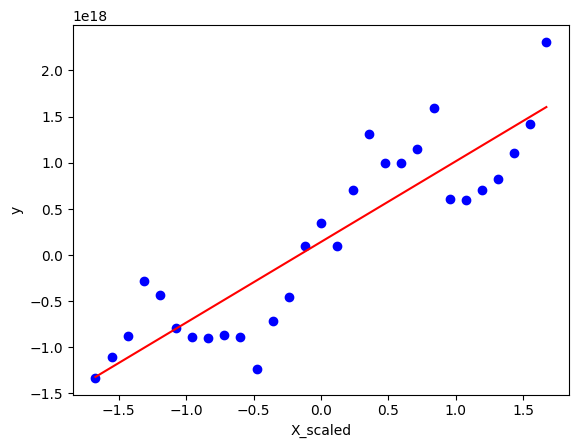

In [5]:


class Regression_OML:
    def __init__(self):
        self.theta = None  # Inicializa os parâmetros do modelo como None

    def fit(self, X, y):
        # Adiciona uma coluna de 1s para intercepto ao X
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  
        # Calcula os parâmetros ótimos usando a Equação Normal
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        # Adiciona uma coluna de 1s para intercepto ao X para previsão
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  
        # Retorna as previsões
        return X_b.dot(self.theta)

    def mean_squared_error(self, X, y):
        # Calcula o MSE
        predictions = self.predict(X)
        return np.mean((predictions - y) ** 2)



model = Regression_OML()  # Cria a instância da classe
model.fit(X_scaled , y)  # Treina o modelo

predictions = model.predict(X_scaled)  # Faz previsões com os dados de entrada

mse = model.mean_squared_error(X_scaled, y)  # Calcula o MSE
print(f"MSE: {mse}")
print(f"Parâmetros (theta): {model.theta.flatten()}")

# Plotando os dados e a linha de regressão com matplotlib
plt.scatter(X_scaled, y, color='blue')
plt.plot(X_scaled, predictions, color='red')
plt.xlabel('X_scaled')
plt.ylabel('y')
plt.show()
